In [2]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.5 MB 465.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.5 MB 717.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.5 MB 1.2 MB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.5 MB 1.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 2.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 3.0 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.4 MB/s eta 0:00:00


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
import re
import pickle


In [4]:
#Download the stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\delfi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
# Load and inspect the dataset
df = pd.read_csv('data/customer_service/train.csv')
print(df.head())
df.info()
print ('************** null values in each column')
print(df.isnull().sum())


                  issue_area                        issue_category  \
0          Login and Account  Mobile Number and Email Verification   
1  Cancellations and returns                   Pickup and Shipping   
2  Cancellations and returns        Replacement and Return Process   
3          Login and Account       Login Issues and Error Messages   
4                      Order                 Order Delivery Issues   

                                  issue_sub_category  \
0  Verification requirement for mobile number or ...   
1           Reasons for being asked to ship the item   
2             Inability to click the 'Cancel' button   
3  Error message regarding exceeded attempts to e...   
4                       Delivery not attempted again   

                         issue_category_sub_category customer_sentiment  \
0  Mobile Number and Email Verification -> Verifi...            neutral   
1  Pickup and Shipping -> Reasons for being asked...            neutral   
2  Replacement an

C:\Users\delfi\AppData\Local\Temp\ipykernel_24032\4005655800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_sentiment', data=df, palette='deep')


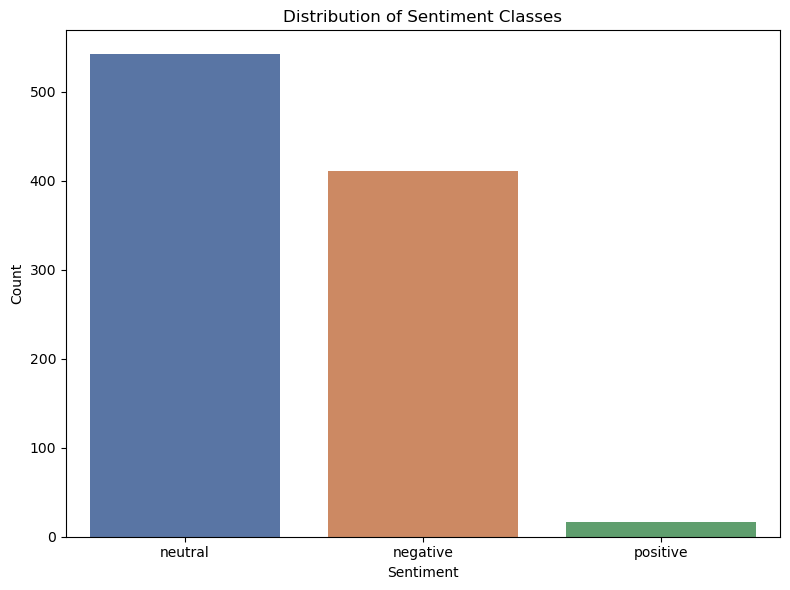

In [14]:
# Analyze sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_sentiment', data=df, palette='deep')
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [15]:
# to analyze the conversation length for each conversation, compute word and char counts
df['word_count'] = df['conversation'].astype(str).apply(lambda x: len(x.split()))
df['char_count'] = df['conversation'].astype(str).apply(lambda x: len(x))


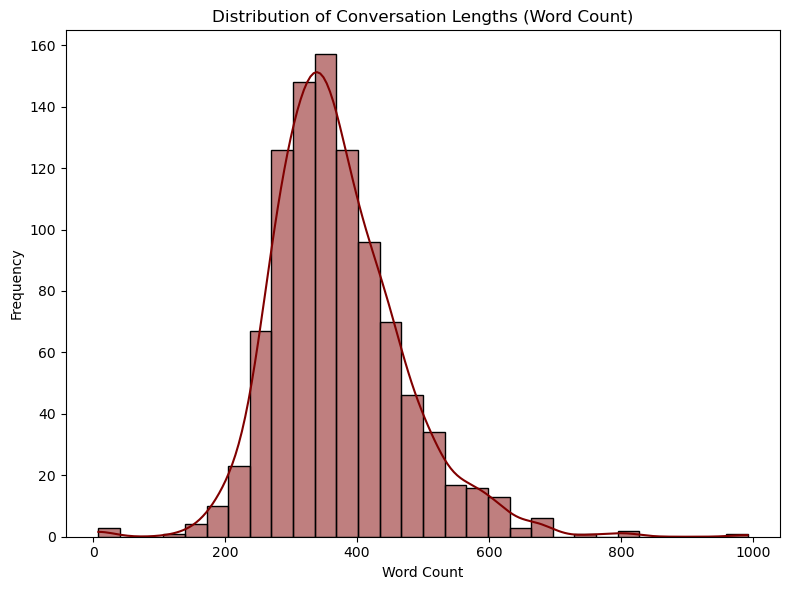

In [16]:
# WORD COUNT
plt.figure(figsize=(8, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='maroon')
plt.title("Distribution of Conversation Lengths (Word Count)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

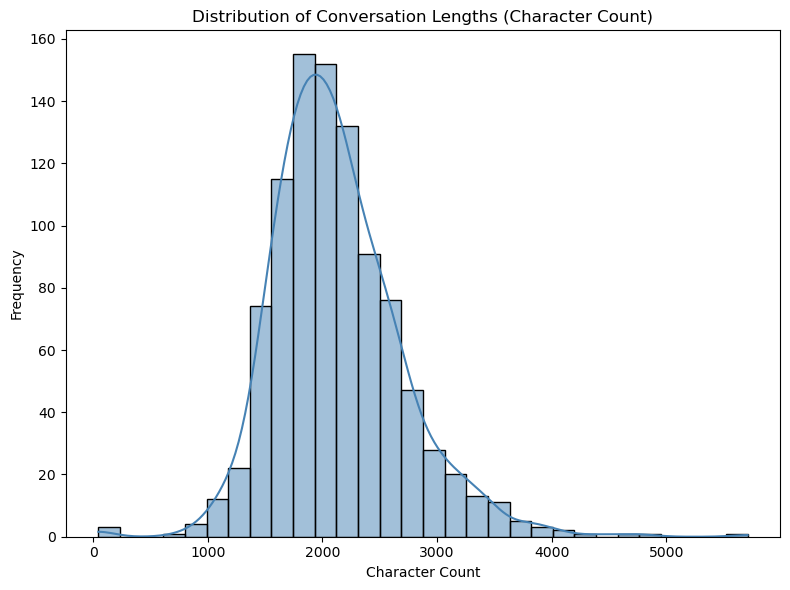

In [20]:
# CHARACTER COUNT
plt.figure(figsize=(8, 6))
sns.histplot(df['char_count'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Conversation Lengths (Character Count)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\delfi\AppData\Local\Temp\ipykernel_24032\2230013311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_sentiment', y='word_count', data=df, palette='Set3')


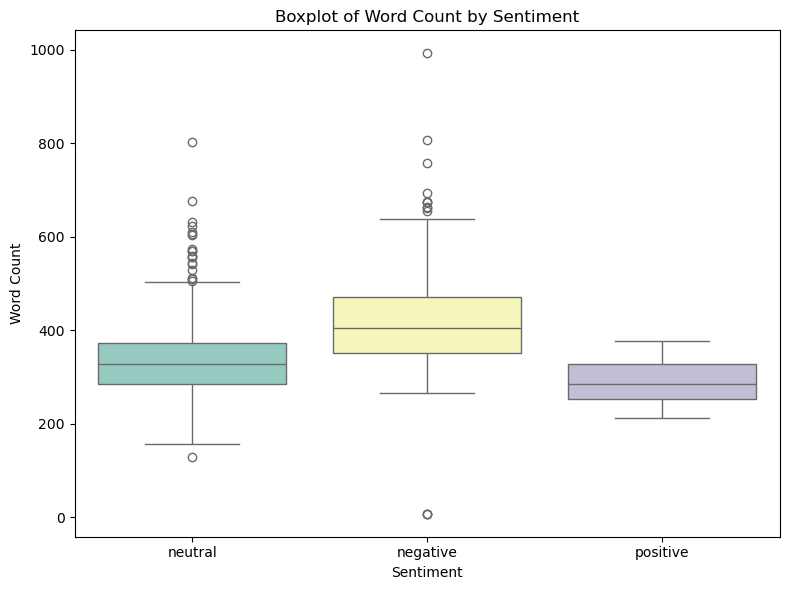

In [22]:
# boxplot to analyze how word counts varies among sentiment classes
plt.figure(figsize=(8, 6))
sns.boxplot(x='customer_sentiment', y='word_count', data=df, palette='Set3')
plt.title("Boxplot of Word Count by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.tight_layout()
plt.show()


In [31]:
# Top Frequent Words per Sentiment analysis
def get_top_n_words(corpus, n=10):
    """"
    "Get the top n most frequent words from a list of documents.
    """
    # stopwords and punctuation definition
    stop_words = list(stopwords.words('english'))
    vectorizer = CountVectorizer(
    stop_words=stop_words,
    lowercase=True,
    token_pattern=r'\b[a-zA-Z]{2,}\b')
    X = vectorizer.fit_transform(corpus)
    # sum word frequencies across all documents
    word_freq = X.sum(axis=0)
    # map words to their frequencies
    freq_dict = {word: word_freq[0, idx] for word, idx in vectorizer.vocabulary_.items()}
    # sort the dictionary by frequency and return the top n words
    sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:n]
    return sorted_words

C:\Users\delfi\AppData\Local\Temp\ipykernel_24032\278825007.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='dark:salmon_r')


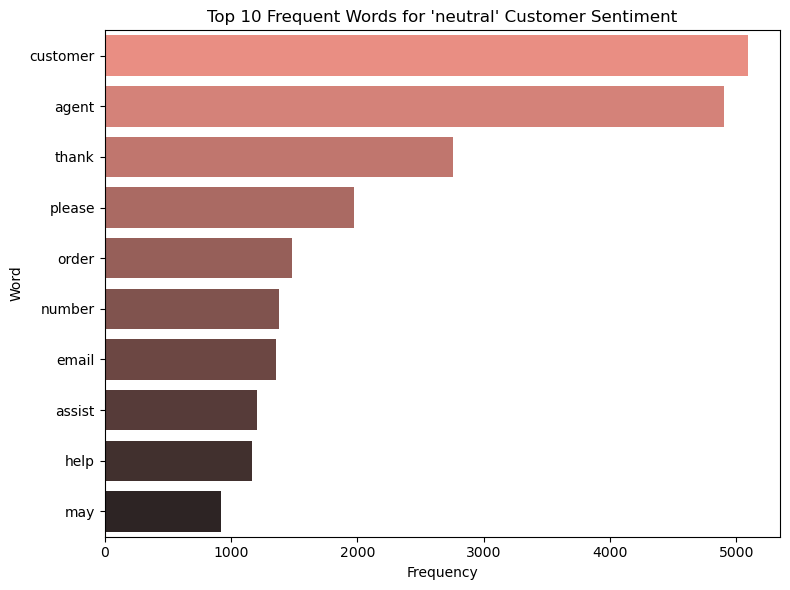

C:\Users\delfi\AppData\Local\Temp\ipykernel_24032\278825007.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='dark:salmon_r')


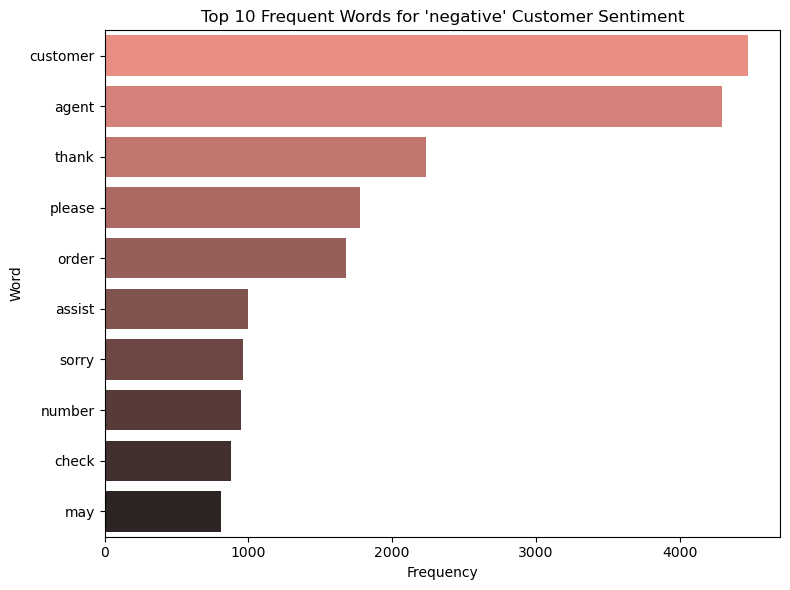

C:\Users\delfi\AppData\Local\Temp\ipykernel_24032\278825007.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='dark:salmon_r')


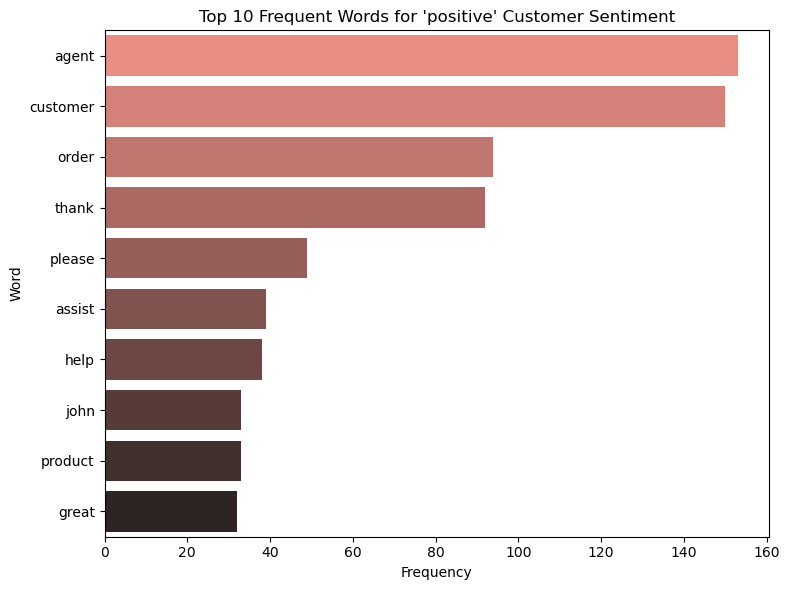

In [35]:
#the top 10 frequent words for each sentiment
sentiments = df['customer_sentiment'].unique()
for sentiment in sentiments:
    subset = df[df['customer_sentiment'] == sentiment]
    corpus = subset['conversation'].dropna().astype(str).tolist()
    top_words = get_top_n_words(corpus, n=10)
    words, counts = zip(*top_words) if top_words else ([], [])
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(counts), y=list(words), palette='dark:salmon_r')
    plt.title(f"Top 10 Frequent Words for '{sentiment}' Customer Sentiment")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()

In [37]:
#crosstab for issue_area and customer_sentiment
crosstab = pd.crosstab(df['issue_area'], df['customer_sentiment'])
print("Crosstab for issue_area and customer_sentiment:")
print(crosstab)

Crosstab for issue_area and customer_sentiment:
customer_sentiment         negative  neutral  positive
issue_area                                            
Cancellations and returns       136      141         0
Login and Account                28      121         0
Order                           156       85        17
Shipping                         37       33         0
Shopping                         36       77         0
Warranty                         18       85         0


In [39]:
#crosstab for product_category and customer_sentiment
crosstab_product = pd.crosstab(df['product_category'], df['customer_sentiment'])
print("Crosstab for product_category and customer_sentiment:")
print(crosstab_product)


Crosstab for product_category and customer_sentiment:
customer_sentiment  negative  neutral  positive
product_category                               
Appliances               190      255         9
Electronics              122      170         1
Men/Women/Kids            99      117         7


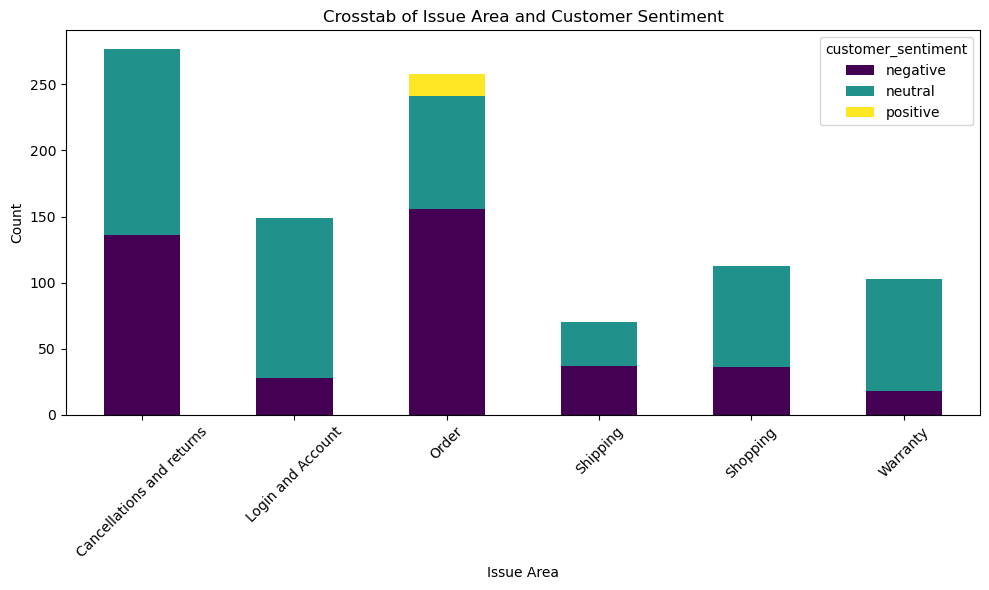

In [ ]:
# visualization of the crosstabs
# issue area vs customer sentiment
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Crosstab of Issue Area and Customer Sentiment")
plt.xlabel("Issue Area")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

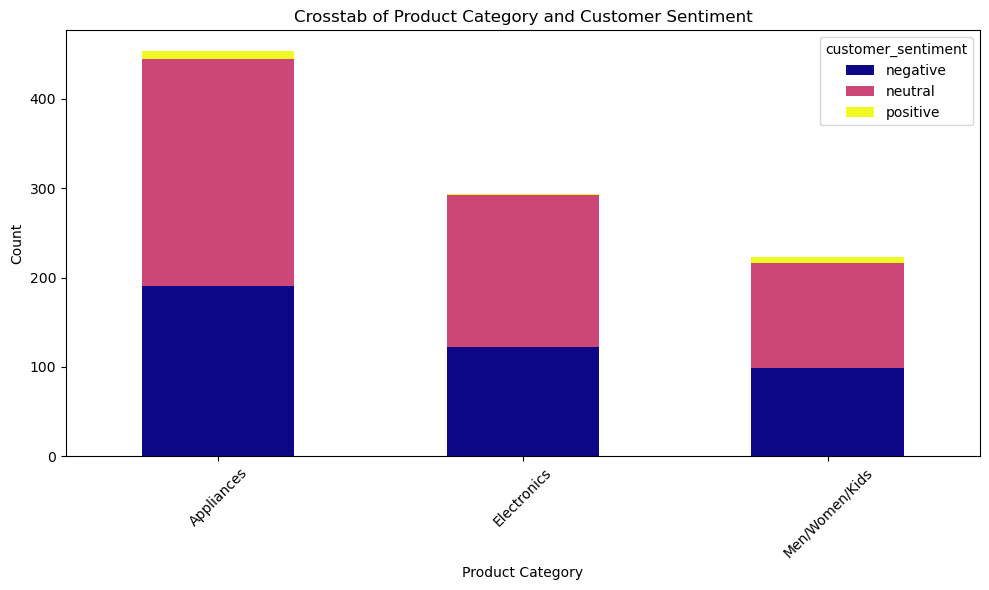

In [41]:
# product category vs customer sentiment
crosstab_product.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title("Crosstab of Product Category and Customer Sentiment")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

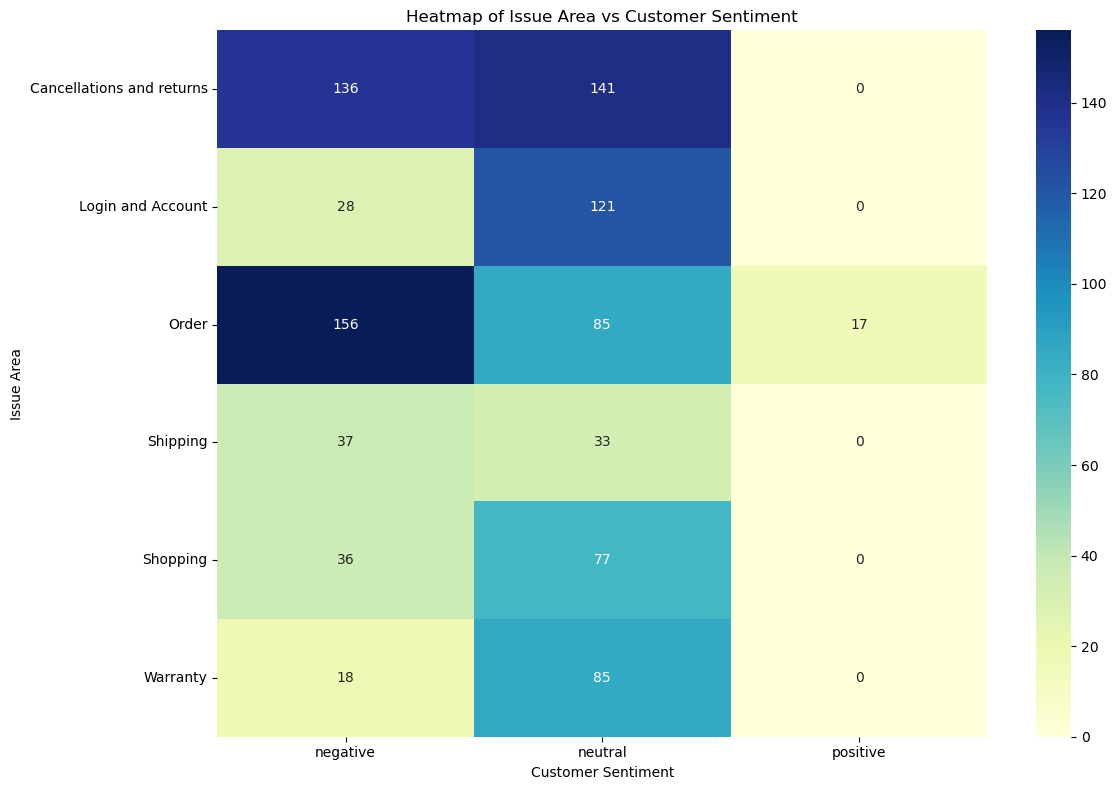

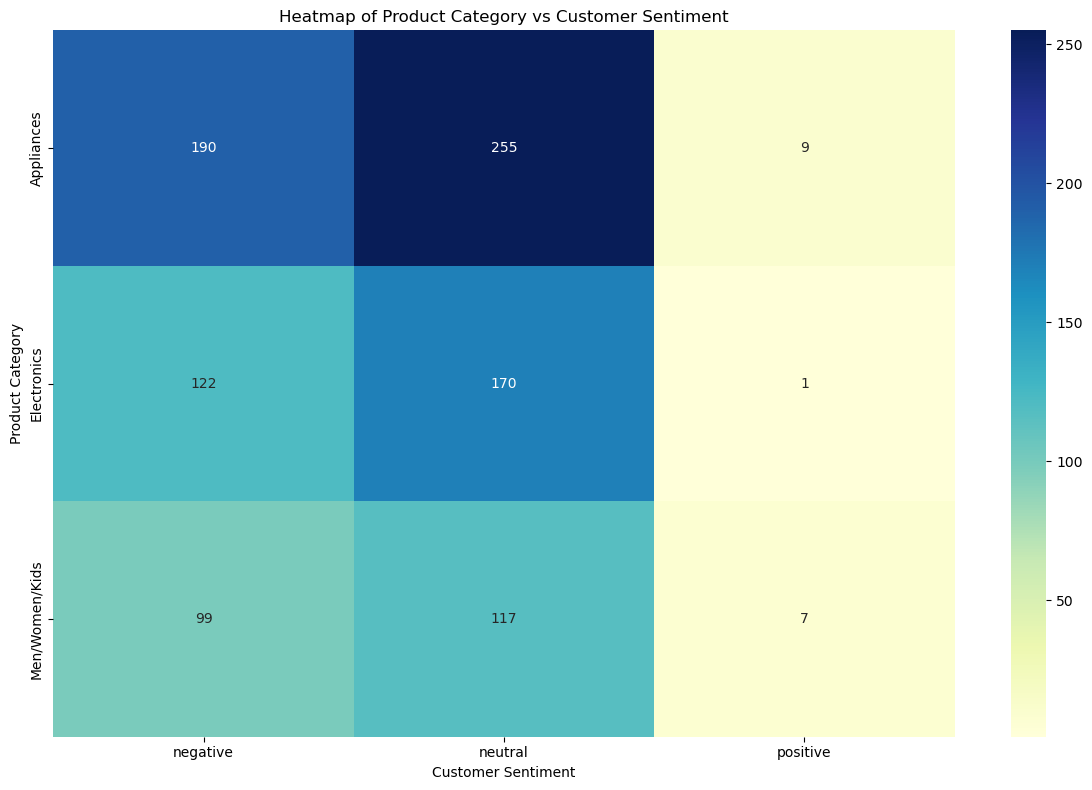

In [43]:
#visualization of the crosstabs as heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Issue Area vs Customer Sentiment")
plt.xlabel("Customer Sentiment")
plt.ylabel("Issue Area")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_product, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Product Category vs Customer Sentiment")
plt.xlabel("Customer Sentiment")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

In [44]:
# crosstab for issue_complexity and customer_sentiment
crosstab_complexity = pd.crosstab(df['issue_complexity'], df['customer_sentiment'])
print("Crosstab for issue_complexity and customer_sentiment:")
print(crosstab_complexity)

Crosstab for issue_complexity and customer_sentiment:
customer_sentiment  negative  neutral  positive
issue_complexity                               
high                      39       40         3
less                     197      268         7
medium                   175      234         7


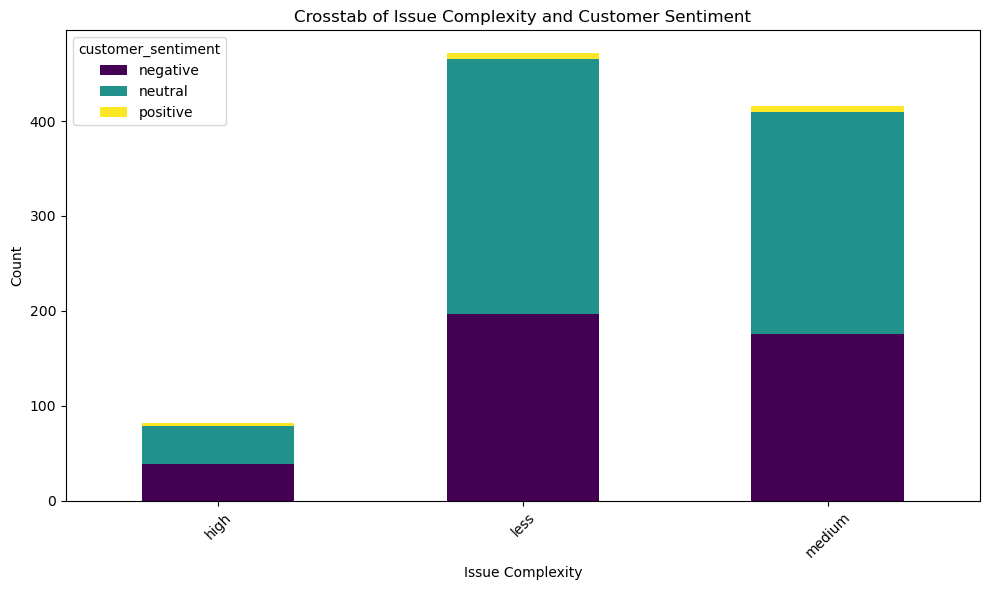

In [45]:
# stacked bar plot for issue complexity vs customer sentiment
crosstab_complexity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Crosstab of Issue Complexity and Customer Sentiment")
plt.xlabel("Issue Complexity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

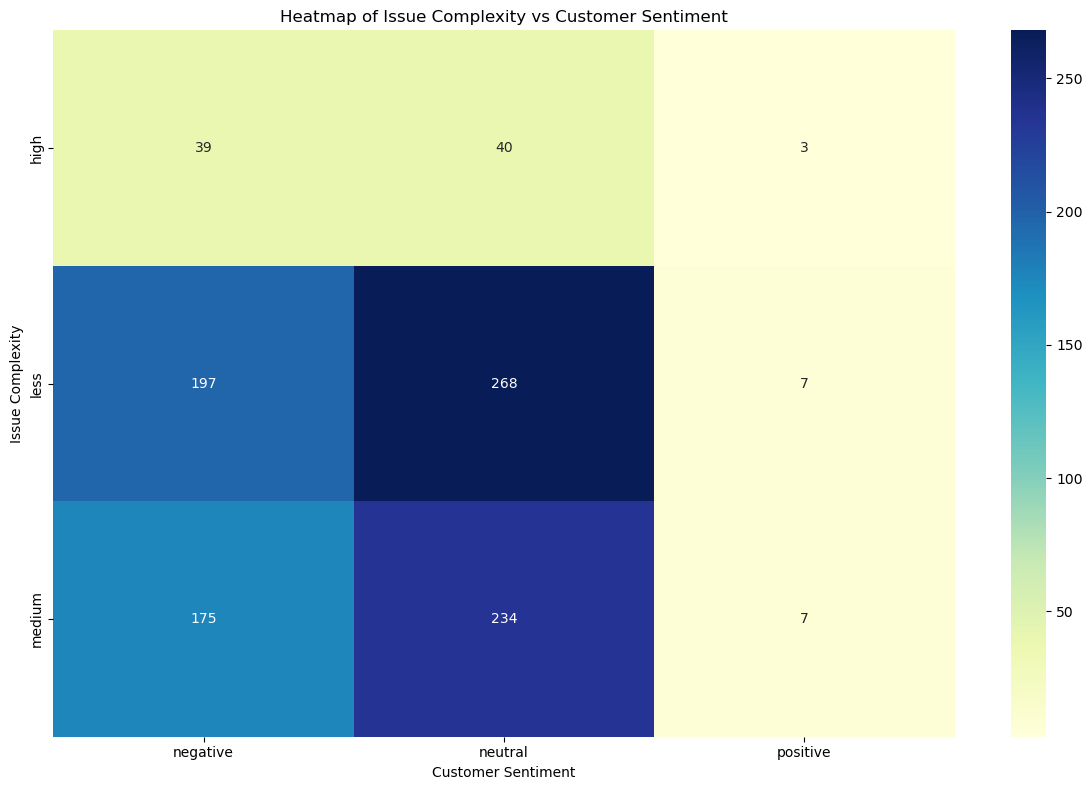

In [46]:
# Heatmap for issue complexity
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_complexity, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Issue Complexity vs Customer Sentiment")
plt.xlabel("Customer Sentiment")
plt.ylabel("Issue Complexity")
plt.tight_layout()
plt.show()

In [47]:
from scipy.stats import chi2_contingency
# Chi-square test for issue complexity
chi2_complexity, p_complexity, dof_complexity, ex_complexity = chi2_contingency(crosstab_complexity)
print("Chi-square test for Issue Complexity vs Customer Sentiment:")
print("Chi2 Statistic:", chi2_complexity)
print("Degrees of Freedom:", dof_complexity)
print("p-value:", p_complexity)
if p_complexity < 0.05:
    print("=> Significant association between issue_complexity and customer_sentiment")
else:
    print("=> No significant association found.")

Chi-square test for Issue Complexity vs Customer Sentiment:
Chi2 Statistic: 3.300219233409547
Degrees of Freedom: 4
p-value: 0.5088975229960727
=> No significant association found.



Crosstab for Agent Experience Level vs Customer Sentiment:
customer_sentiment      negative  neutral  positive
agent_experience_level                             
experienced                  147      188         4
inexperienced                 47       93         1
junior                       217      261        12


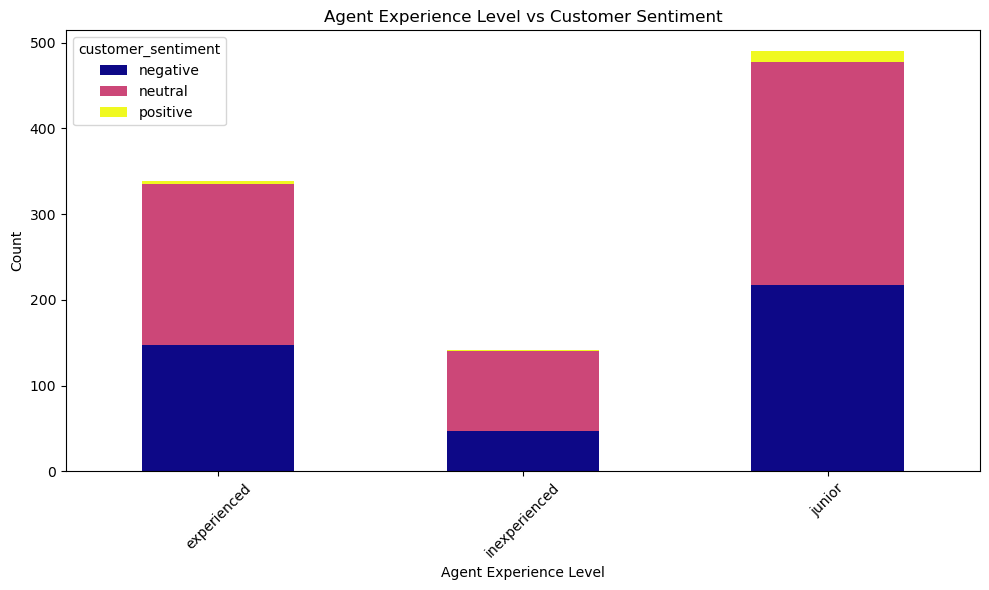

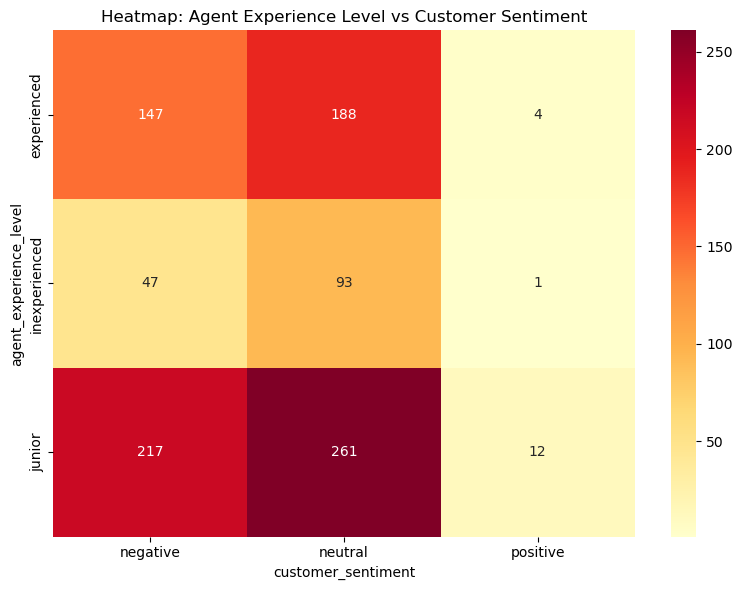


Chi-square test for Agent Experience Level vs Customer Sentiment:
Chi2 Statistic: 9.259812544746723
Degrees of Freedom: 4
p-value: 0.05492352706636956
=> No significant association found.


In [49]:
# same analysis for agent_experience_level
crosstab_agent = pd.crosstab(df['agent_experience_level'], df['customer_sentiment'])
print("\nCrosstab for Agent Experience Level vs Customer Sentiment:")
print(crosstab_agent)

# Stacked Bar Chart for Agent Experience Level
crosstab_agent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title("Agent Experience Level vs Customer Sentiment")
plt.xlabel("Agent Experience Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap for Agent Experience Level
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_agent, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Heatmap: Agent Experience Level vs Customer Sentiment")
plt.tight_layout()
plt.show()

# Chi-Square Test for Agent Experience Level
chi2_agent, p_agent, dof_agent, ex_agent = chi2_contingency(crosstab_agent)
print("\nChi-square test for Agent Experience Level vs Customer Sentiment:")
print("Chi2 Statistic:", chi2_agent)
print("Degrees of Freedom:", dof_agent)
print("p-value:", p_agent)
if p_agent < 0.05:
    print("=> Significant association between agent_experience_level and customer_sentiment")
else:
    print("=> No significant association found.")

In [57]:
# only the required columns: customer sentiment and conversation
df = df[['customer_sentiment', 'conversation']]

# text pre-processing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Normalize whitespace by replacing multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the pre-processing function to the conversation text using .loc to avoid SettingWithCopyWarning
df.loc[:, 'clean_conversation'] = df['conversation'].apply(preprocess_text)

# Create train and validation subsets
# Here we use stratified splitting to maintain similar sentiment distributions in both sets.
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['customer_sentiment'])

# Display the shapes of the new subsets
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)

# Save the cleaned train data to the 'data' folder
tr_output_path = 'data/customer_service/cleaned_train.csv'
# Save the processed train data to the specified path
train_df.to_csv(output_file_path, index=False)

# Save the cleaned train data
train_output_path = 'data/customer_service/cleaned_train.csv'
train_df.to_csv(train_output_path, index=False)
print(f"Cleaned train file saved to: {train_output_path}")

# Save the validation data
val_output_path = 'data/customer_service/val_split.csv'
val_df.to_csv(val_output_path, index=False)
print(f"Validation file saved to: {val_output_path}")


print(f"Cleaned file saved")

Train set shape: (776, 3)
Validation set shape: (194, 3)
Cleaned train file saved to: data/customer_service/cleaned_train.csv
Validation file saved to: data/customer_service/val_split.csv
Cleaned file saved


In [56]:
# building vocab from cleaned conversations in TR data

# combine all conversations into a single string
all_text = ' '.join(train_df['clean_conversation'].astype(str).tolist())
#tokenize
tokens = all_text.split()
unique_tokens = sorted(list(set(tokens)))
vocab_size = len(unique_tokens)
print(f"Vocabulary size: {vocab_size}")

# mappings
stoi = {word: i+1 for i, word in enumerate(unique_tokens)}
itos = {i+1: word for i, word in enumerate(unique_tokens)}

# save meta
meta = {
    'stoi': stoi,
    'itos': itos,
    'vocab_size': vocab_size + 1 # padding token
}

meta_path = 'data/customer_service/meta.pkl'
with open(meta_path, 'wb') as f:
    pickle.dump(meta, f)
print(f"Meta data saved to: {meta_path}")

Vocabulary size: 3203
Meta data saved to: data/customer_service/meta.pkl
